# Project 4: Regression Modeling
## Due: Monday, Nov. 4th, 2024

### Names: Keiran Berry
### Course Level: Undergraduate

**Introduction:**
* In this project, we explore building regression models to predict what you might expect for miles/gallon (MPG) fuel economy based on vehicle charateristics

<u>**Note:** The project will be graded by me running your notebook from top to bottom (choosing the "run all" option) - if it errors out at any point - this is where I stop grading and you'll lose ALL points after the error - Even if they are correct!</u>

* <u>Moral of the story is, **Make sure your entire notebook executes from top to bottom and you're happy with the results BEFORE you submit to the drop box!**</u>

**Objectives:**
* The objective of this project is to use scikit-learn to investigate different regression models for fuel economy estimation.

# Let's grab the data and have a look at the dataset

## **Important note, to get the data, we need to install the UCIMLRepo package using pip**
* In your command line, run the following:
    - pip install ucimlrepo

## All Students

**Problem A (60pts)**

1. (5pts) Let's grab the data from UCI (you'll need to pip install ucimlrepo)

* Note: a description of the dataset can be found [Here](https://archive.ics.uci.edu/dataset/9/auto+mpg)

* <u><b>Questions:</b> How many features are there per observation? What do these features represent? How many classes? How many observations are in the data?</u>

In [7]:
import numpy as np
from ucimlrepo import fetch_ucirepo # Be sure to read above - need to install the ucimlrepo package using pip #
  
# fetch dataset 
# using import statements from dataset documentation page
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets

  
# variable information, features, shapes, etc. 
print("Shape of data: ", X.shape)
print("Shape of targets: ", y.shape)
print("Observation information:\n", auto_mpg.variables) 

uniqueLabels = np.unique(y)
print("\nTotal classes: ", len(uniqueLabels))

Shape of data:  (398, 7)
Shape of targets:  (398, 1)
Observation information:
            name     role         type demographic description units  \
0  displacement  Feature   Continuous        None        None  None   
1           mpg   Target   Continuous        None        None  None   
2     cylinders  Feature      Integer        None        None  None   
3    horsepower  Feature   Continuous        None        None  None   
4        weight  Feature   Continuous        None        None  None   
5  acceleration  Feature   Continuous        None        None  None   
6    model_year  Feature      Integer        None        None  None   
7        origin  Feature      Integer        None        None  None   
8      car_name       ID  Categorical        None        None  None   

  missing_values  
0             no  
1             no  
2             no  
3            yes  
4             no  
5             no  
6             no  
7             no  
8             no  

Total classes:  129

### Responses:
* There are 7 features per observation. This can be seen both in the shape of the data and in the printed observation information.
* These features represent observable characteristics of the car whos mileage we are attempting to categorize, such as horsepower, weight, and model year.
* There are 129 total classes, which can be seen in the number of unique labels found in our target matrix.
* There are 398 observations in the dataset, which we can see in both shapes.

In [9]:
# Check for missing values in the data and remove the observations with missing values #
numXMissing = X.isnull().sum().sum() # use isnull to check for missing values, 2 sums for the 2d array 
numYMissing = y.isnull().sum().sum()
print("Number of missing values in features:", numXMissing)
print("Number of missing values in target:", numYMissing)

Number of missing values in features: 6
Number of missing values in target: 0


### <u>Question: Is there missing data?  If so, which features are missing and how many observations are they missing in?</u>
### Response:
* Yes, there is missing data. We can see that when we use the dropna() function, some observations are dropped.
* In the "missing values" printed area a couple cells above, we can see that feature 3 is the only one which has missing values. Referencing the table above that one, feature 3 appears to be horsepower.
* This feature is missing in 6 of the observations, as we can see printed above. Removing these would change our total number of observations to 392.

2. (5pts.) Remove the missing data from both the feature set AND the associated targets

In [12]:
# Important:  Get the index (rows) where the missing data exist in X BEFORE removing them! #
missingIndices = X[X.isnull().any(axis=1)].index # getting the indices in case we need them later, but my method doesn't require them at the moment

# Now, let's remove the rows (observations) with missing values and re-check the size of the data #
# Don't forget to also drop the corresponding target values for each sample with missing data #
cleanX = X.dropna()  # drop observations with missing features
cleanY = y.loc[cleanX.index]  # drop target values that had their observations dropped

# Print the new shapes for both Data (X) and targets (y)
print("Shape of data after removing missing values:", cleanX.shape)
print("Shape of targets after removing missing values:", cleanY.shape)


Shape of data after removing missing values: (392, 7)
Shape of targets after removing missing values: (392, 1)


### Okay, our data "should" be in good shape now - let's do some EDA

3. (10 pts) Perform some EDA as outlined below and discuss your observations/results (i.e., provide a description of what the EDA is telling you about correlations, etc.)

* Let's plot a scatterplotmatrix (should look similar to the one below): <u>What features do you notice are correlated, uncorrelated, outliers?, etc.  Describe what information you get from the plot below</u>

<u>Describe your plot here:</u>
### Response:
* The features which I can see are correlated have a clear diagonal trend. For example, weight and horsepower, weight and displacement, and mpg and model year all have strong positive correlation. Some examples of features with negative correlation include acceleration and horsepower, mpg and weight, and mpg and horsepower. These correlations in relation to the targets also make sense, as manufacturers are constantly trying to improve mpg, as well as more weight resulting in less mpg. These correlations line up with my preconceived notions about mileage.
* Some examples of uncorrelated data, or data with no clear trend, include many of the model year statistics. Obviously, many different vehicles of different weights, horsepower, and cylinders will be made every year, so there is no clear trend.
* Some outliers are visible in this scatterplotmatrix, such as a vehicle with a particularly high horsepower for a lower weight, and a particularly high horsepower for a specific mpg. These outliers may make some classifications difficult, as they do not follow the trend of features which are correlated, but as there is still a strong correlation those features are certainly important to classification.

<img src="Figures/ScatterPlotMat.png" alt="Scatter Plot Matrix" style="width:500px;"/>

In [14]:
import matplotlib.pyplot as plt

# Need to import mlextend
# conda install conda-forge::mlxtend

from mlxtend.plotting import scatterplotmatrix 

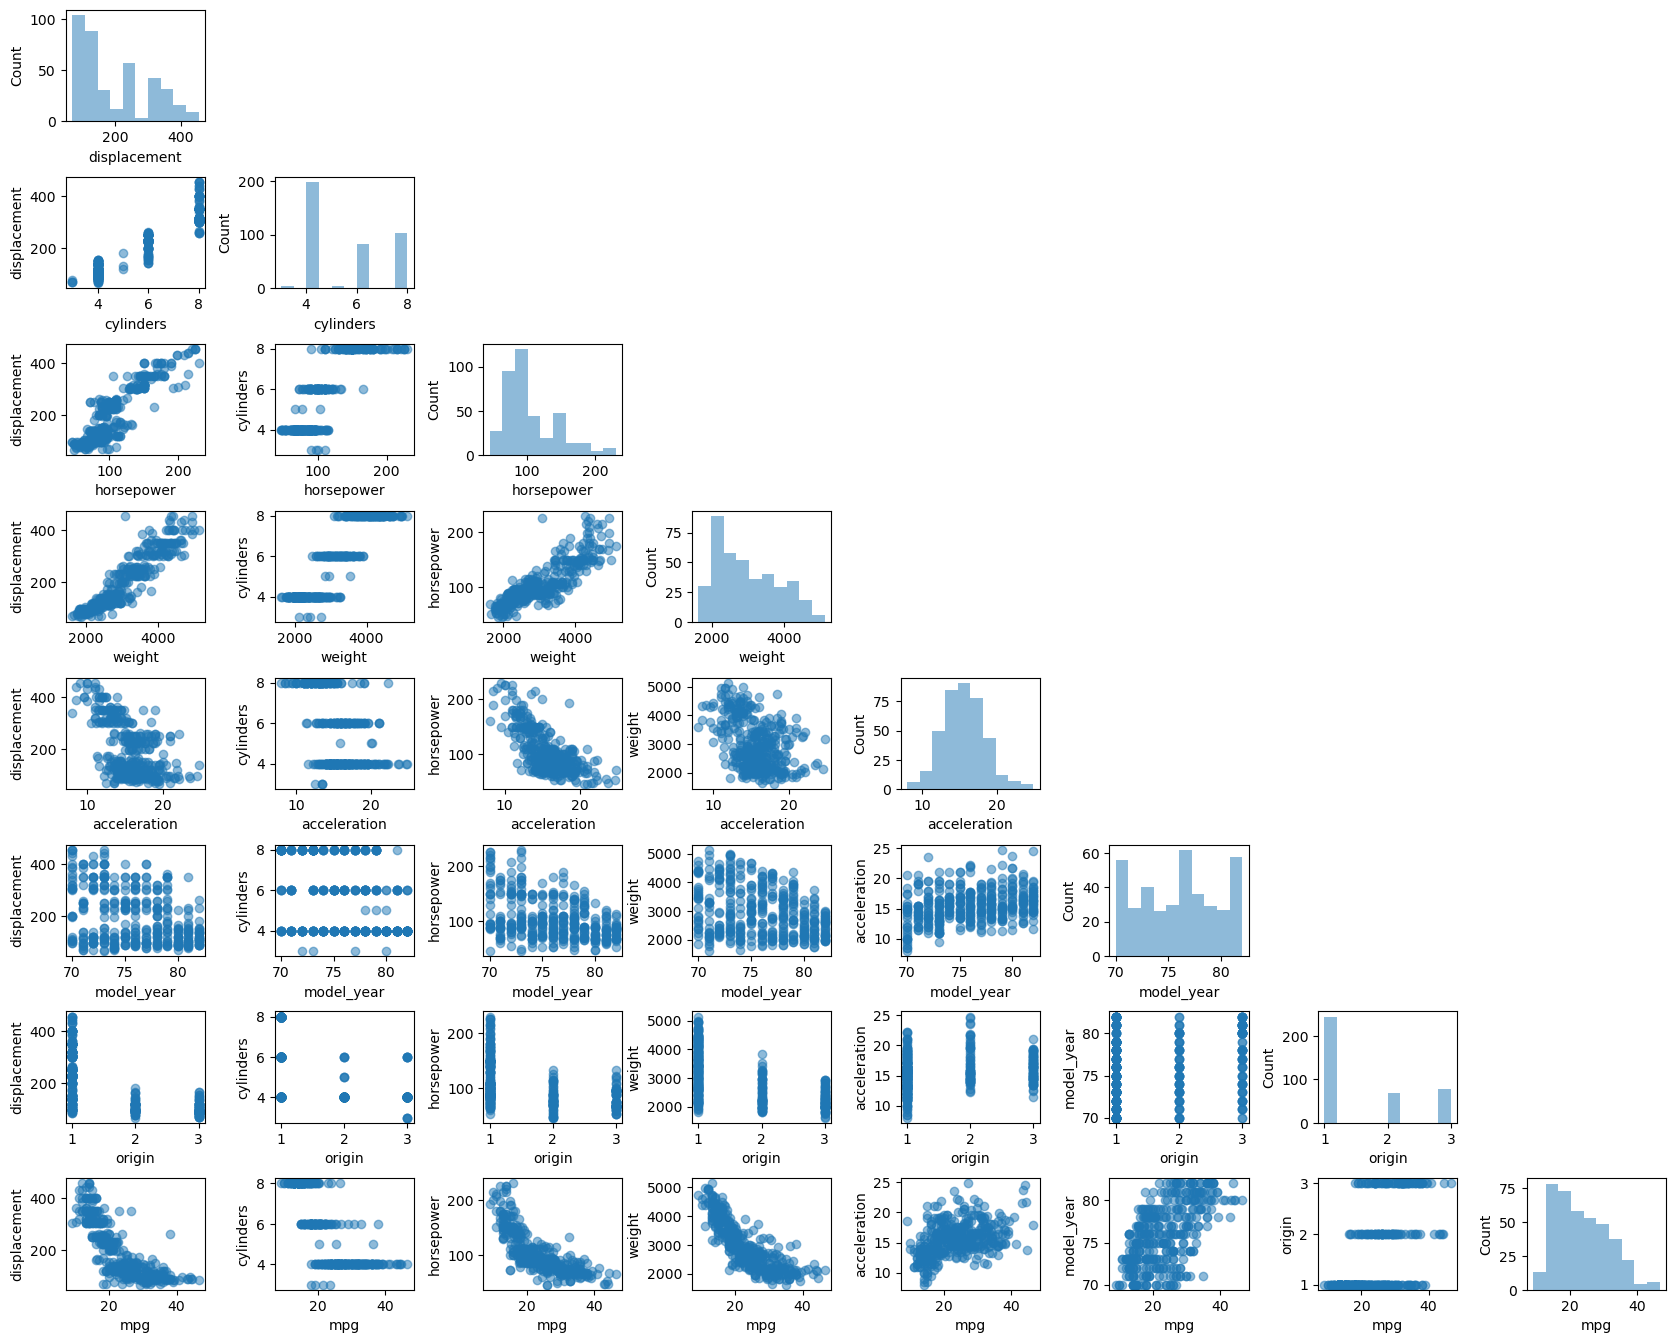

In [15]:
# Plot the scatterplotmatrix to get an idea about how correlated the features are across samples #
# Note: we currently have the data features in X and the targets in y.  We need to concatinate them
# so we can get an idea about correlations w.r.t. the targets too #
import pandas as pd

data = pd.concat([cleanX, cleanY], axis=1)
scatterplotmatrix(data.values, alpha=0.5, figsize=(20, 16), names=data.columns)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.5, wspace=0.5)
plt.show()

* Let's also look at a correlation plot (should look similar to the plot below): <u>What features do yo notice are correlated, uncorrelated, etc.  Describe what information you get from the plot below</u>

<u>Describe your plot here:</u>
### Response:
* Looking at the correlation matrix, I can clearly see which features have strong correlations or lack thereof. I notice that mpg is strongly negatively correlated with displacement, cylinders, horsepower, and weight. A couple of positive correlation examples include displacement and cylinders, displacement and weight, and cylinders and weight.
* The uncorrelated features are those closest to zero, for example origin and model year or acceleration and origin. These make sense as things that would not be correlated.
* This plot reads much easier to me than the scatterplotmatrix, as it is easier to see a concrete number to compare one potential correlation to another. I can see where things I thought were more correlated, such as mpg and model year, are not as correlated as I thought when looking at objective numbers.
<img src="Figures/CorrelationPlot.png" alt="Correlation Plot" style="width:400px;"/>

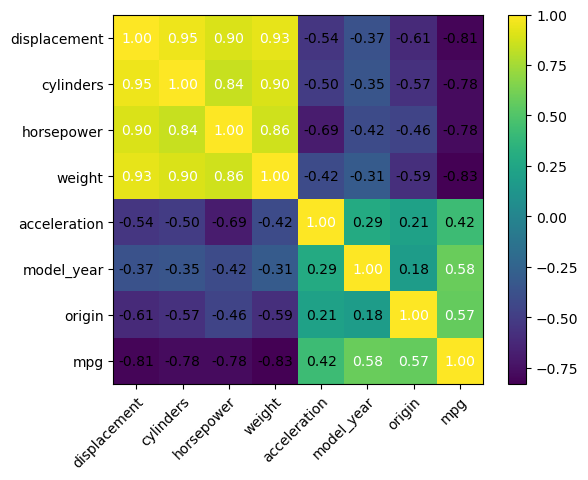

In [17]:
import numpy as np
from mlxtend.plotting import heatmap
# Look at the correlation matrix #
correlationMatrix = data.corr()
heatmap(correlationMatrix.values, 
        row_names=data.columns, 
        column_names=data.columns)
plt.show()

### Okay, let's go ahead and build a model:  **You can choose if you want to build a simple linear regression model OR a robust regression model (RANSAC)**

##### **Note:** Don't forget, we need to: a) scale the data and b) do a test_train_split to evaluate model performance (let's do 80% train and 20% test this time)

4. (40pts.) Build a linear regression model using a single feature of your choice (I chose weight but feel free to pick what you find interesting from the EDA above).  Perform a performance analysis of your second model using:
    - Residues
    - $R^2$ (coefficient of determination)

* The first model you build will be a simple linear model of your_feature vs. mpg.
* The second model will include ALL of the features

In [19]:
# It looked like weight was highly correlated with mpg so I grabbed this data (use whatever feature you like here) #
horsepower = cleanX[['horsepower']]

Scale the data

In [21]:
from sklearn.preprocessing import StandardScaler
# Scale the data using standardScaler #
hpScaler = StandardScaler()
yScaler = StandardScaler()
scaledHorsepower = hpScaler.fit_transform(horsepower)
scaledY = yScaler.fit_transform(cleanY)

Split the data into training and testing

In [23]:
from sklearn.model_selection import train_test_split

# Split the data 80/20 #
trainHorsepower, testHorsepower, trainY, testY = train_test_split(scaledHorsepower, scaledY, test_size = 0.2, random_state = 1)


In [24]:
# Helper function to plot the regression line #
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

Build a simple linear regression model on a single feature vs. mpg (be sure to plot the model coefficents and intercept)

In [26]:
# Build the Linear Regression model
from sklearn.linear_model import LinearRegression

# Sklearn Regression model (not scaled)#
linearRegression = LinearRegression()
linearRegression.fit(trainHorsepower, trainY)

LinearRegression()

Plot the model against a scatter plot of the data

**IF you chose weight for your feature, your plot should look something like this:**

<img src="Figures/ScatterPlot1.png" alt="Original Scatter" style="width:400px;"/>

Coefficient(s):  [[-0.77874461]]
Intercept:  [-0.03654807]


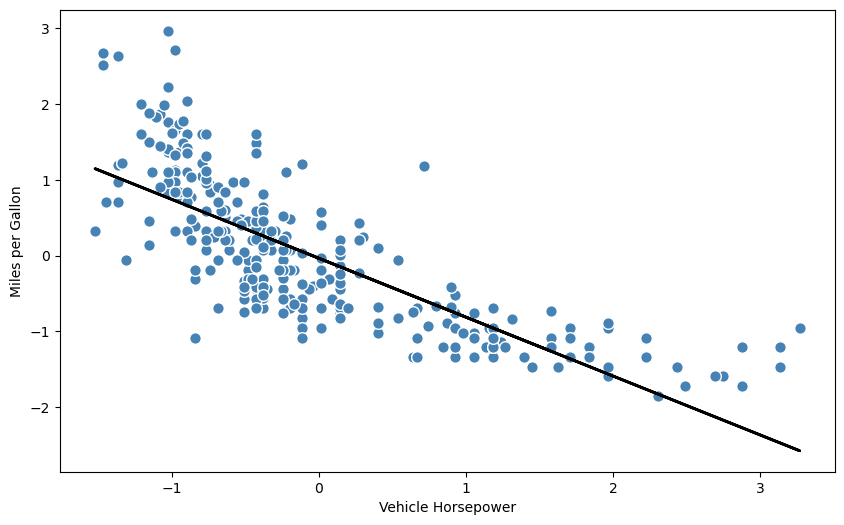

In [28]:
# Let's plot the model and see how well it does #
plt.figure(figsize=(10, 6))
lin_regplot(trainHorsepower, trainY, linearRegression)

coefficients = linearRegression.coef_
intercept = linearRegression.intercept_
print("Coefficient(s): ", coefficients)
print("Intercept: ", intercept)

plt.xlabel('Vehicle Horsepower')
plt.ylabel('Miles per Gallon')
plt.show()

#### **Note:** We're still in scaled space, let's generate a plot just like the one above, but in the unscaled space so we can really see what's going on with the relationship between vehicle weight and MPG

* You need to do the predicitons in scaled space, then invert BOTH the predictions and the test_features back to unscaled space

**Your plot should look like this**

<img src="Figures/ScatterPlot2.png" alt="Normal Scatter" style="width:400px;"/>

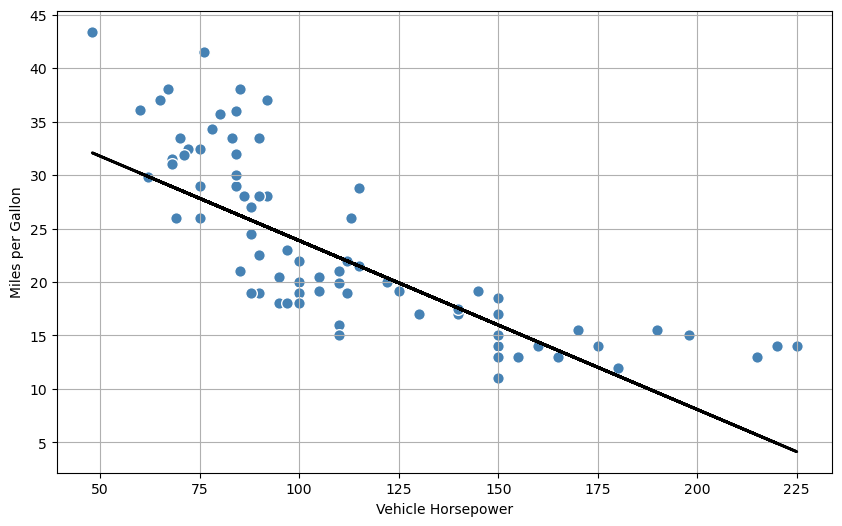

In [30]:
# Grab the test set to see what the predicted mpg is #
predictions = linearRegression.predict(testHorsepower)

# Now we need to "bring the prediction" back from un-scaled space #
# Also need to bring the test features back #
predictions = yScaler.inverse_transform(predictions)
testHorsepower = hpScaler.inverse_transform(testHorsepower)
testY = yScaler.inverse_transform(testY)

# Let's plot the model and see how well it does #
plt.figure(figsize=(10, 6))
plt.scatter(testHorsepower, testY, c='steelblue', edgecolor='white', s=70)
plt.plot(testHorsepower, predictions, color='black', lw=2)
plt.xlabel('Vehicle Horsepower')
plt.ylabel('Miles per Gallon')
plt.grid()
plt.show()

#### Okay, let's build a linear model using the entire dataset, and evaluate the performance

1. First generate a residue plot for the full model (i.e., using all features given)
2. Then look at the $R^2$ score for the model

<u>Question:</u> How well does the model work? (Answered below)

Scale the full dataset (if yoyu didn't do this above and only scaled a single feature)

In [33]:
# If you didn't do this above, scale the entire dataset including all features #
# targets have already been scaled, but not data
xScaler = StandardScaler()
scaledX = xScaler.fit_transform(cleanX)

# Perform a new test/train split on the entire scaled dataset #
# Split the data 80/20 #
trainX, testX, trainY, testY = train_test_split(scaledX, scaledY, test_size = 0.2, random_state = 1)


Train the full model and print the model parameters (weights and bias)

In [35]:
# Fit the model and perform the predictions on the test set #
# Print the intercept and coefficients #
linearRegression = LinearRegression() # just making sure we have a fresh one in case of unintended side effects
linearRegression.fit(trainX, trainY)
testPredictions = linearRegression.predict(testX)

Plot the residues for both testing and training

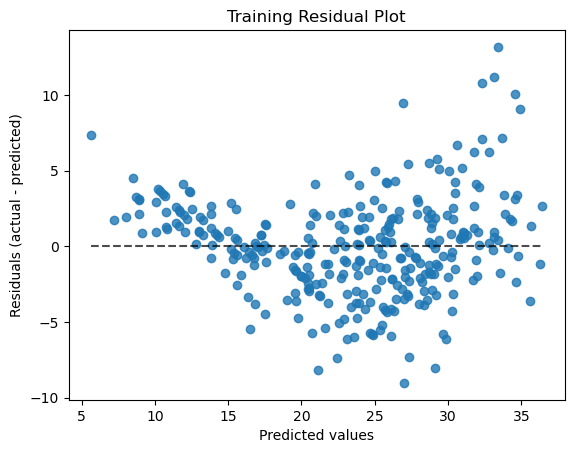

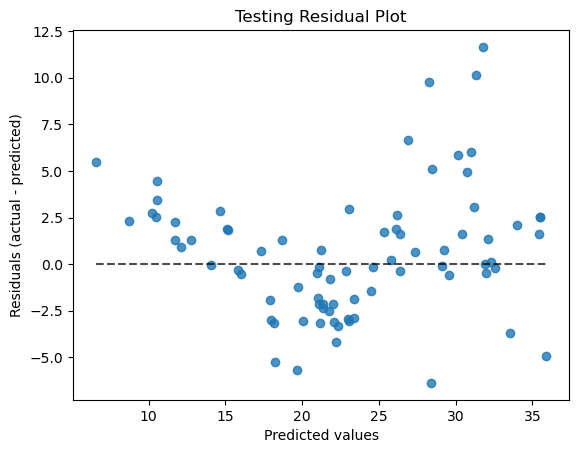

In [37]:
# Let's plot the residues #
# We have the predicted test set, let's predict the training set and plot the residues for both #
trainPredictions = linearRegression.predict(trainX)

# unscaling so that the values are real
trainPredictions = yScaler.inverse_transform(trainPredictions)
testPredictions = yScaler.inverse_transform(testPredictions)
unscaledTrainY = yScaler.inverse_transform(trainY)
unscaledTestY = yScaler.inverse_transform(testY)

# Plot residuals
from sklearn.metrics import PredictionErrorDisplay

display = PredictionErrorDisplay(y_true=unscaledTrainY, y_pred=trainPredictions)
display.plot()
plt.title('Training Residual Plot')
plt.show()

display = PredictionErrorDisplay(y_true=unscaledTestY, y_pred=testPredictions)
display.plot()
plt.title('Testing Residual Plot')
plt.show()

Compute the $R^2$ value:

<u>Question:</u> How well does the model perform? (discuss)
### Response:
* The model performs relatively well, with an $R^2$ value of about .82 on both the training and testing data. This means that the model explains about 82% of the variability in the target variable.
* Looking at the residual plots, we can see that most of the predictions are generally within +/- 2.5 mpg of the target. This is overall a good result. One thing which the model seems to struggle with is picking up those few outliers with particularly high mpg. This can be seen in the higher predicted values section, where the model predicted 30-35 mpg and the residual value was still 10 or higher. Since this means that these vehicles had over 40-45 mpg, it makes sense that it would be hard to make a guess at these outliers. 

In [39]:
from sklearn.metrics import r2_score
# Compute and display the R^2 for both training and testing sets #

trainR2 = r2_score(unscaledTrainY, trainPredictions)
testR2 = r2_score(unscaledTestY, testPredictions)

print("Training R^2: ", trainR2)
print("Testing R^2: ", testR2)

Training R^2:  0.8180487829836616
Testing R^2:  0.826633579733363


**Problem B (40pts)**

1. (30pts) Let's "redo" the above analysis but build a regression tree as opposed to a Linear model

* Don't worry about building the "single feature" tree, let's just use the entire dataset and:
    - Plot the residuals
    - Compute the $R^2$ value

In [41]:
# Build the regression tree (choos what depth you want - play with this to see how it effects model evaluation) #
from sklearn.tree import DecisionTreeRegressor

decisionTree = DecisionTreeRegressor(random_state=1, max_depth=7)
decisionTree.fit(trainX, trainY)

DecisionTreeRegressor(max_depth=7, random_state=1)

Plot the regression tree

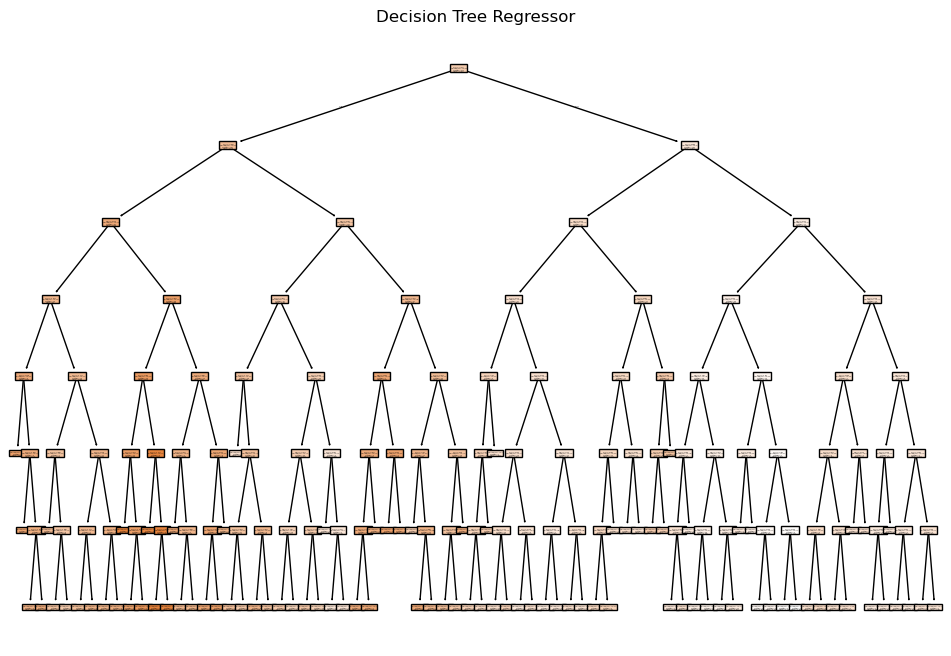

In [43]:
from sklearn import tree

plt.figure(figsize=(12, 8))
tree.plot_tree(decisionTree, filled=True)
plt.title("Decision Tree Regressor")
plt.show()

Do the prediction on the test set, and perform model evaluation as outlined above

In [45]:
# Predict for all samples #
testPredictions = decisionTree.predict(testX)

Plot the residues

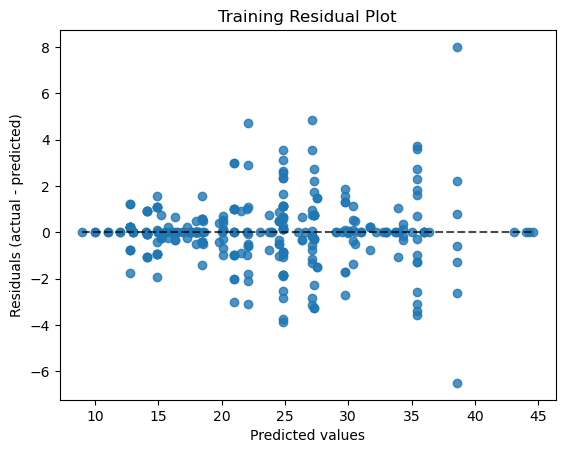

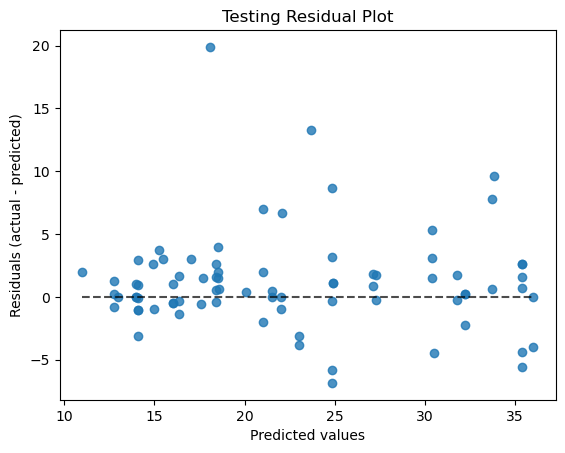

In [47]:
# Let's plot the residues #
# We have the predicted test set, let's predict the training set #
trainPredictions = decisionTree.predict(trainX)

# unscaling so that the values are real
trainPredictions = yScaler.inverse_transform(trainPredictions.reshape(-1, 1))
testPredictions = yScaler.inverse_transform(testPredictions.reshape(-1, 1))
unscaledTrainY = yScaler.inverse_transform(trainY)
unscaledTestY = yScaler.inverse_transform(testY)

# Plot residuals
from sklearn.metrics import PredictionErrorDisplay

display = PredictionErrorDisplay(y_true=unscaledTrainY, y_pred=trainPredictions)
display.plot()
plt.title('Training Residual Plot')
plt.show()

display = PredictionErrorDisplay(y_true=unscaledTestY, y_pred=testPredictions)
display.plot()
plt.title('Testing Residual Plot')
plt.show()

Compute the $R^2$ value:

In [49]:
# Compute and display the R^2 for both training and testing sets #
trainR2 = r2_score(unscaledTrainY, trainPredictions)
testR2 = r2_score(unscaledTestY, testPredictions)

print("Training R^2: ", trainR2)
print("Testing R^2: ", testR2)

Training R^2:  0.9662202029572999
Testing R^2:  0.7643426879968482


### Observations:
* This classifier does not do as well with generalizing as the linear regression model which we trained earlier. The $R^2$ value for the training set is generally between .95 and .99, at various depths. While these are high, the $R^2$ value for the testing set is only about .76 at a max depth of 7.
* We can force the model to do slightly better, such as getting an $R^2$ of about .8 at depth of 10, which of course results in overtraining as our $R^2$ value on the training set gets very close to 1.0.

2. (10pts) Perform the exact same experiements as in problem B.1 but using a Random Forest regressor

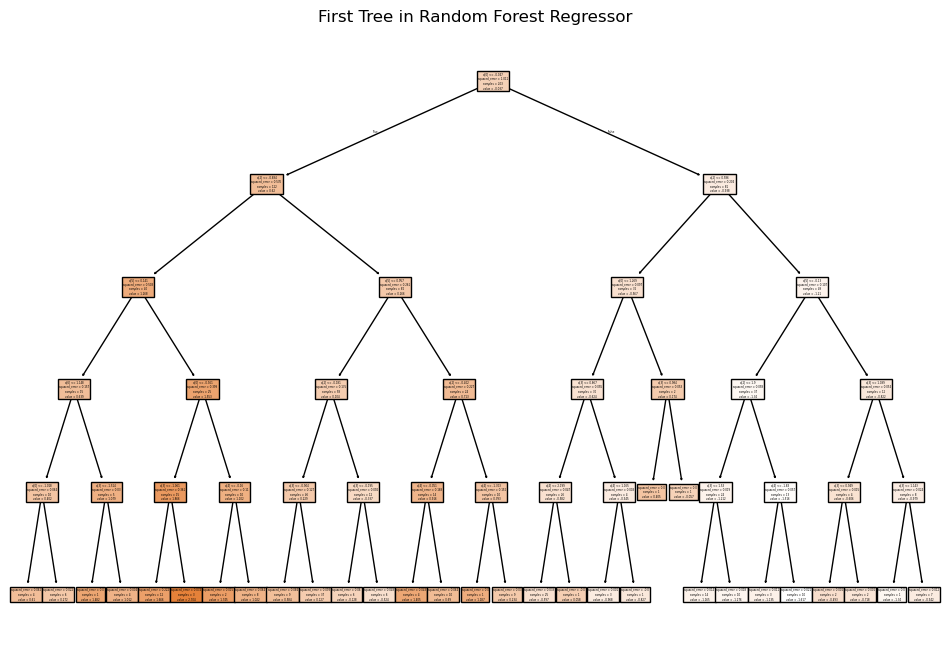

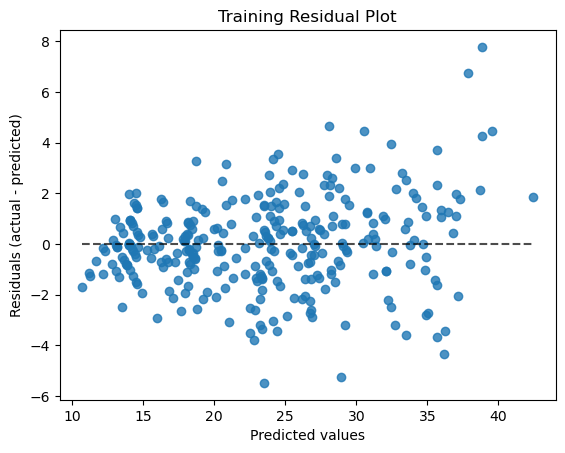

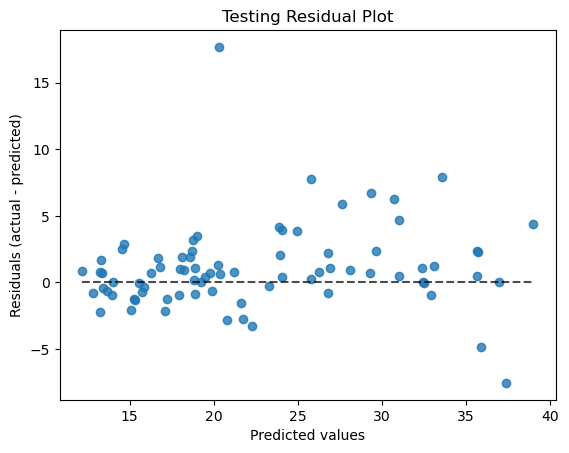

Training R^2:  0.9461501869267338
Testing R^2:  0.8401327648008197


In [52]:
from sklearn.ensemble import RandomForestRegressor

randomForestRegressor = RandomForestRegressor(random_state=1, max_depth=5)
randomForestRegressor.fit(trainX, trainY.ravel()) # have to flatten y into a 1d array

# random forest regressor isn't super "plottable" unless we just want to look at a single tree
# plotting one just for fun
plt.figure(figsize=(12, 8))
tree.plot_tree(randomForestRegressor.estimators_[0], filled=True)
plt.title("First Tree in Random Forest Regressor")
plt.show()

# Predict for all samples #
testPredictions = randomForestRegressor.predict(testX)

# Let's plot the residues #
# We have the predicted test set, let's predict the training set #
trainPredictions = randomForestRegressor.predict(trainX)

# unscaling so that the values are real
trainPredictions = yScaler.inverse_transform(trainPredictions.reshape(-1, 1))
testPredictions = yScaler.inverse_transform(testPredictions.reshape(-1, 1))
unscaledTrainY = yScaler.inverse_transform(trainY)
unscaledTestY = yScaler.inverse_transform(testY)

# Plot residuals

display = PredictionErrorDisplay(y_true=unscaledTrainY, y_pred=trainPredictions)
display.plot()
plt.title('Training Residual Plot')
plt.show()

display = PredictionErrorDisplay(y_true=unscaledTestY, y_pred=testPredictions)
display.plot()
plt.title('Testing Residual Plot')
plt.show()

# Compute and display the R^2 for both training and testing sets #
trainR2 = r2_score(unscaledTrainY, trainPredictions)
testR2 = r2_score(unscaledTestY, testPredictions)

print("Training R^2: ", trainR2)
print("Testing R^2: ", testR2)

### Observations:
* This classifier does much better overall than the Decision Tree Regressor. While the Decision Tree Regressor mainly had $R^2$ values in the .7 - .8 range, the Random Forest Regressor lands in the .85 range consistently.
* This also makes the Random Forest Regressor competitive with the Linear Regression model, which was in the .82 range. With a number of depths, from 5 to 10, there is not much increase in $R^2$ value as depth increases. At a depth of 10, I was able to achieve an $R^2$ value of about .86, so it defititely makes more sense to remove complexity for similar results.

## CSC 549 Students Only!

### Note that some of the features illustrated in Problem A.3 (scatterplotmatrix) show that the correlation between that feature and the mpg is actually somewhat nonlinear

* Build a nonlinear regression model (e.g. some polynomial function) using horsepower vs. mpg
* Evaluate the residuals, $R^2$, and discuss your solution (e.g., what model ended up working well?)